In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
data = pd.read_csv('./shotloc_data/NBA_2004_2023_Shots.csv/NBA_2004_2023_Shots.csv')

Exploring.

In [3]:
data.groupby(['SEASON_2'])['GAME_ID'].nunique()

SEASON_2
2003-04    1189
2004-05    1230
2005-06    1230
2006-07    1230
2007-08    1230
2008-09    1230
2009-10    1230
2010-11    1230
2011-12     990
2012-13    1229
2013-14    1230
2014-15    1230
2015-16    1230
2016-17    1230
2017-18    1230
2018-19    1230
2019-20    1059
2020-21    1076
2021-22    1230
2022-23    1230
Name: GAME_ID, dtype: int64

In [4]:
data.SEASON_2.value_counts()

2018-19    219458
2022-23    217220
2021-22    216722
2017-18    211707
2016-17    209929
2015-16    207893
2014-15    205550
2013-14    204126
2012-13    201579
2009-10    200966
2007-08    200501
2010-11    199761
2008-09    199030
2004-05    197626
2006-07    196072
2005-06    194314
2020-21    190983
2003-04    189803
2019-20    188116
2011-12    161205
Name: SEASON_2, dtype: int64

In [5]:
data.columns

Index(['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
       'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
       'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
       'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT'],
      dtype='object')

In [6]:
data['LOC_X'] = round(data['LOC_X'], 2)
data['LOC_Y'] = round(data['LOC_Y'], 2)

In [7]:
data['QUARTER'].value_counts()

1    1046486
2    1003224
3     984026
4     950555
5      24228
6       3412
7        557
8         73
Name: QUARTER, dtype: int64

In [8]:
games_8_quarters = data[data['QUARTER']==8]

In [9]:
# games_8_quarters[games_8_quarters['GAME_ID']==21500391]

In [10]:
games_8_quarters[games_8_quarters['SEASON_1']==2016]['GAME_ID']

1595272    21500391
1595273    21500391
1595274    21500391
1595275    21500391
1595276    21500391
1595277    21500391
1595278    21500391
1595279    21500391
1595280    21500391
1595281    21500391
1595282    21500391
1595283    21500391
1595284    21500391
1595285    21500391
1595286    21500391
1595287    21500391
1595288    21500391
1595289    21500391
1595290    21500391
1595291    21500391
Name: GAME_ID, dtype: int64

In [11]:
games_8_quarters['SEASON_1'].value_counts()

2017    20
2016    20
2019    17
2012    16
Name: SEASON_1, dtype: int64

Testing how to plot shot locations.

The code for the plots was developed with the help of this article: https://towardsdatascience.com/make-a-simple-nba-shot-chart-with-python-e5d70db45d0d

In [12]:
data_sethcurry_2022 = data[(data['PLAYER_NAME'] == 'Seth Curry') & (data['SEASON_2'] == '2022-23')]

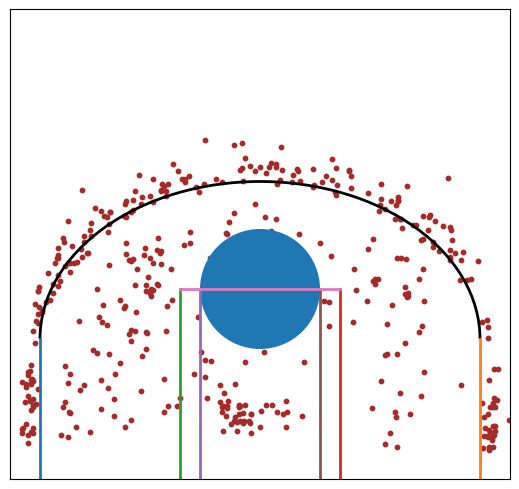

In [13]:
fig = plt.figure(figsize=(5, 4.7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim(-250, 250)
ax.set_ylim(0, 470)
ax.set_xticks([])
ax.set_yticks([])
# fig.patch.set_alpha(0.0)
# fig.set_facecolor('none')

ax.scatter(data_sethcurry_2022['LOC_X']*10, data_sethcurry_2022['LOC_Y']*10, color='brown', marker='o', s=10, alpha=1)

# Short corner 3PT lines
ax.plot([-220, -220], [0, 140], linewidth=2)
ax.plot([220, 220], [0, 140], linewidth=2)
ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, lw=2))
# Lane and Key
ax.plot([-80, -80], [0, 190], linewidth=2)
ax.plot([80, 80], [0, 190], linewidth=2)
ax.plot([-60, -60], [0, 190], linewidth=2)
ax.plot([60, 60], [0, 190], linewidth=2)
ax.plot([-80, 80], [190, 190], linewidth=2)
ax.add_artist(mpl.patches.Circle((0, 190), 60, lw=2))

# fig.savefig('mi_grafico.png', transparent=True, bbox_inches='tight')

plt.show()

In [14]:
# data_sethcurry_2022

Most common locations.

In [15]:
data.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,HOME_TEAM,AWAY_TEAM,EVENT_TYPE,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2023,2022-23,1610612764,Washington Wizards,203078,Bradley Beal,G,SG,10-19-2022,22200004,IND,WAS,Made Shot,True,Jump Shot,3PT Field Goal,Left Corner 3,Left Side,L,24+ ft.,23.4,12.95,24,1,11,20
1,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,10-19-2022,22200004,IND,WAS,Missed Shot,False,Step Back Jump shot,3PT Field Goal,Above the Break 3,Center,C,24+ ft.,-0.4,31.45,26,1,10,52
2,2023,2022-23,1610612764,Washington Wizards,1628420,Monte Morris,G,PG,10-19-2022,22200004,IND,WAS,Made Shot,True,Running Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-1.3,5.25,1,1,10,39
3,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,10-19-2022,22200004,IND,WAS,Made Shot,True,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-0.1,7.25,2,1,10,31
4,2023,2022-23,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,10-19-2022,22200004,IND,WAS,Made Shot,True,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,1.8,7.15,2,1,10,5


In [16]:
data_2003_04 = data[data['SEASON_2'] == '2003-04']

data_2003_04['COORDINATE'] = data_2003_04['LOC_X'].astype(str) + '_' + data_2003_04['LOC_Y'].astype(str)

C:\Users\dcast\AppData\Local\Temp\ipykernel_2100\527680628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2003_04['COORDINATE'] = data_2003_04['LOC_X'].astype(str) + '_' + data_2003_04['LOC_Y'].astype(str)


In [17]:
data_2003_04_locs = data_2003_04.groupby(['COORDINATE', 'LOC_X', 'LOC_Y']).agg({'COORDINATE': 'count'})

In [18]:
data_2003_04_locs = data_2003_04_locs.rename(columns={'COORDINATE': 'COUNT'})

In [19]:
data_2003_04_locs = data_2003_04_locs.reset_index()

In [20]:
data_2003_04_locs

,COORDINATE,LOC_X,LOC_Y,COUNT
0,-0.0_10.05,-0.0,10.05,30
1,-0.0_10.15,-0.0,10.15,37
2,-0.0_10.35,-0.0,10.35,36
3,-0.0_10.55,-0.0,10.55,26
4,-0.0_10.65,-0.0,10.65,24
...,...,...,...,...
41013,9.9_9.25,9.9,9.25,1
41014,9.9_9.35,9.9,9.35,3
41015,9.9_9.55,9.9,9.55,1
41016,9.9_9.75,9.9,9.75,3


In [21]:
locs_2003_04_top5k = data_2003_04_locs.sort_values(by='COUNT', ascending=False).head(5000)

In [22]:
locs_2003_04_top5k

,COORDINATE,LOC_X,LOC_Y,COUNT
163,-0.0_5.25,-0.0,5.25,46846
347,-0.1_5.35,-0.1,5.35,97
21176,0.6_5.25,0.6,5.25,54
1444,-1.1_5.25,-1.1,5.25,50
730,-0.5_5.25,-0.5,5.25,48
...,...,...,...,...
7339,-15.4_20.75,-15.4,20.75,6
10417,-19.0_6.45,-19.0,6.45,6
6230,-14.3_17.55,-14.3,17.55,6
20373,-9.8_20.75,-9.8,20.75,6


In [23]:
# locs_2003_04_top250.isna().sum().sum()

In [24]:
len(data_2003_04_locs)

41018

In [25]:
data_2022_23 = data[data['SEASON_2'] == '2022-23']

data_2022_23['COORDINATE'] = data_2022_23['LOC_X'].astype(str) + '_' + data_2022_23['LOC_Y'].astype(str)

C:\Users\dcast\AppData\Local\Temp\ipykernel_2100\1988476232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022_23['COORDINATE'] = data_2022_23['LOC_X'].astype(str) + '_' + data_2022_23['LOC_Y'].astype(str)


In [26]:
data_2022_23_locs = data_2022_23.groupby(['COORDINATE', 'LOC_X', 'LOC_Y']).agg({'COORDINATE': 'count'})

In [27]:
data_2022_23_locs = data_2022_23_locs.rename(columns={'COORDINATE': 'COUNT'})
data_2022_23_locs = data_2022_23_locs.reset_index()
locs_2022_23_top5k = data_2022_23_locs.sort_values(by='COUNT', ascending=False).head(5000)

In [28]:
locs_2022_23_top5k

,COORDINATE,LOC_X,LOC_Y,COUNT
211,-0.0_5.25,-0.0,5.25,6281
30066,0.1_6.05,0.1,6.05,160
30061,0.1_5.85,0.1,5.85,129
217,-0.0_5.85,-0.0,5.85,122
488,-0.1_5.75,-0.1,5.75,119
...,...,...,...,...
29758,-9.9_28.25,-9.9,28.25,8
11432,-16.9_25.25,-16.9,25.25,8
11436,-16.9_25.65,-16.9,25.65,8
18848,-23.7_8.85,-23.7,8.85,8


Plot 2003-04.

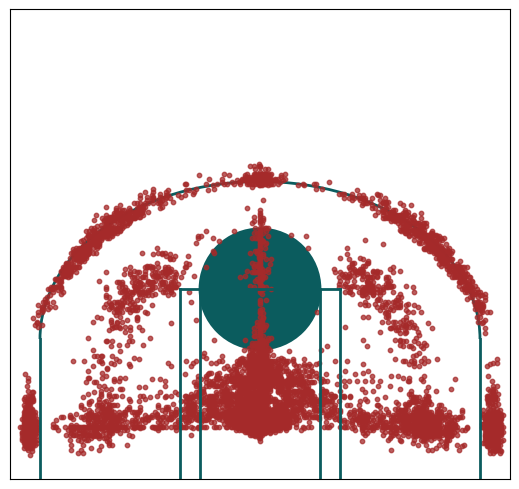

In [35]:
fig = plt.figure(figsize=(5, 4.7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim(-250, 250)
ax.set_ylim(0, 470)
ax.set_xticks([])
ax.set_yticks([])

# ax.hexbin(data_sethcurry_2022['LOC_X']*10, data_sethcurry_2022['LOC_Y']*10, gridsize=(80, 80), extent=(-300, 300, 0, 940), cmap='Blues')

color = "#0b5c5e"

# Short corner 3PT lines
ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
ax.plot([220, 220], [0, 140], linewidth=2, color=color)
ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, lw=2, color=color))
# Lane and Key
ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
ax.plot([80, 80], [0, 190], linewidth=2, color=color)
ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
ax.plot([60, 60], [0, 190], linewidth=2, color=color)
ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
ax.add_artist(mpl.patches.Circle((0, 190), 60, lw=2, color=color))

ax.scatter(locs_2003_04_top5k['LOC_X']*10, locs_2003_04_top5k['LOC_Y']*10, color='brown', marker='o', s=10, alpha=0.75)


# fig.savefig('2003-04.png', transparent=True, bbox_inches='tight')

plt.show()

Plot 2022-23.

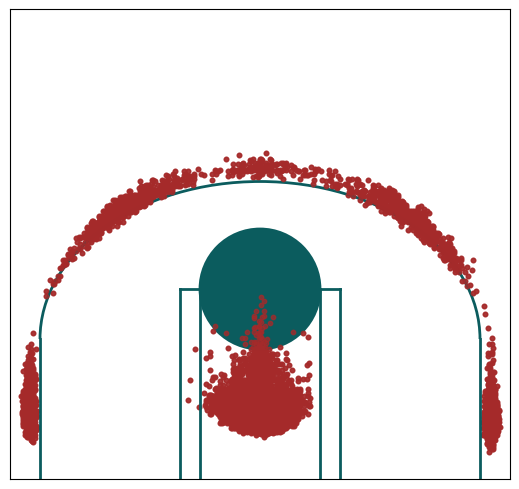

In [34]:
fig = plt.figure(figsize=(5, 4.7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim(-250, 250)
ax.set_ylim(0, 470)
ax.set_xticks([])
ax.set_yticks([])

# ax.hexbin(data_sethcurry_2022['LOC_X']*10, data_sethcurry_2022['LOC_Y']*10, gridsize=(80, 80), extent=(-300, 300, 0, 940), cmap='Blues')
ax.scatter(locs_2022_23_top5k['LOC_X']*10, locs_2022_23_top5k['LOC_Y']*10, color='brown', marker='o', s=10, alpha=0.75)

color = "#0b5c5e"

# Short corner 3PT lines
ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
ax.plot([220, 220], [0, 140], linewidth=2, color=color)
ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, lw=2, color=color))
# Lane and Key
ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
ax.plot([80, 80], [0, 190], linewidth=2, color=color)
ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
ax.plot([60, 60], [0, 190], linewidth=2, color=color)
ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
ax.add_artist(mpl.patches.Circle((0, 190), 60, lw=2, color=color))

ax.scatter(locs_2022_23_top5k['LOC_X']*10, locs_2022_23_top5k['LOC_Y']*10, color='brown', marker='o', s=10, alpha=0.75)

# fig.savefig('2022-23.png', transparent=True, bbox_inches='tight')

plt.show()

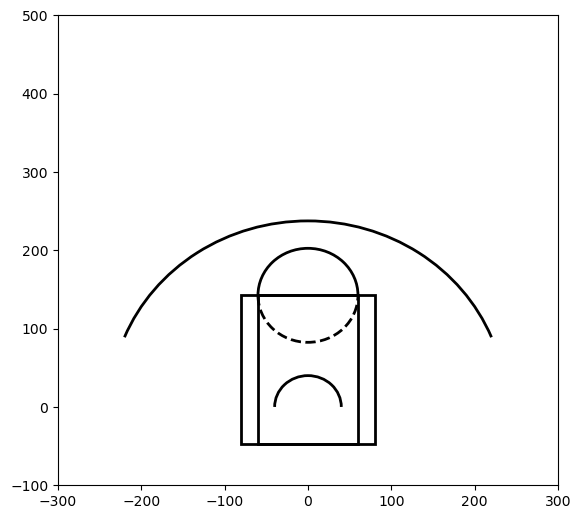

In [31]:
from matplotlib.patches import Circle, Rectangle, Arc
lw=2

fig = plt.figure(figsize=(5, 4.7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim(-300, 300)
ax.set_ylim(-100, 500)

# The paint
# Create the outer box 0f the paint, width=16ft, height=19ft
ax.add_patch(Rectangle((-80, -47.5), 160, 190, linewidth=lw, fill=False))

# Create the inner box of the paint, widt=12ft, height=19ft
ax.add_patch(Rectangle((-60, -47.5), 120, 190, linewidth=lw, fill=False))

# Create free throw top arc
ax.add_artist(mpl.patches.Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, fill=False))
# Create free throw bottom arc
ax.add_artist(mpl.patches.Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, linestyle='dashed'))
# Restricted Zone, it is an arc with 4ft radius from center of the hoop
ax.add_artist(mpl.patches.Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw))

# Three point line
# Create the side 3pt lines, they are 14ft long before they begin to arc
ax.add_patch(Rectangle((-220, -47.5), 0, 140, linewidth=lw))
ax.add_patch(Rectangle((220, -47.5), 0, 140, linewidth=lw))
# 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
# I just played around with the theta values until they lined up with the 
# threes
ax.add_artist(mpl.patches.Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw))

plt.show()


In [32]:
data_2005_06 = data[data['SEASON_2'] == '2005-06']
data_2005_06['COORDINATE'] = data_2005_06['LOC_X'].astype(str) + '_' + data_2005_06['LOC_Y'].astype(str)
data_2005_06_locs = data_2005_06.groupby(['COORDINATE', 'LOC_X', 'LOC_Y']).agg({'COORDINATE': 'count'})
data_2005_06_locs = data_2005_06_locs.rename(columns={'COORDINATE': 'COUNT'})
data_2005_06_locs = data_2005_06_locs.reset_index()
data_2005_06_locs
locs_2005_06_top250 = data_2005_06_locs.sort_values(by='COUNT', ascending=False).head(5000)

C:\Users\dcast\AppData\Local\Temp\ipykernel_2100\1334206659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2005_06['COORDINATE'] = data_2005_06['LOC_X'].astype(str) + '_' + data_2005_06['LOC_Y'].astype(str)


C:\Users\dcast\AppData\Local\Temp\ipykernel_2100\4248283730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2005_06['COORDINATE'] = data_2005_06['LOC_X'].astype(str) + '_' + data_2005_06['LOC_Y'].astype(str)


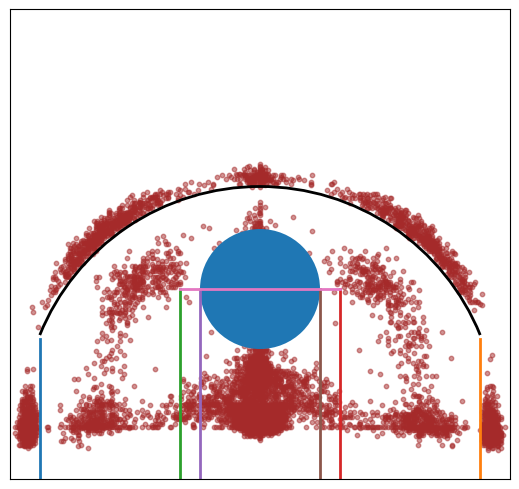

In [33]:
data_2005_06 = data[data['SEASON_2'] == '2005-06']
data_2005_06['COORDINATE'] = data_2005_06['LOC_X'].astype(str) + '_' + data_2005_06['LOC_Y'].astype(str)
data_2005_06_locs = data_2005_06.groupby(['COORDINATE', 'LOC_X', 'LOC_Y']).agg({'COORDINATE': 'count'})
data_2005_06_locs = data_2005_06_locs.rename(columns={'COORDINATE': 'COUNT'})
data_2005_06_locs = data_2005_06_locs.reset_index()
data_2005_06_locs
fig = plt.figure(figsize=(5, 4.7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim(-250, 250)
ax.set_ylim(0, 470)
ax.set_xticks([])
ax.set_yticks([])

# ax.hexbin(data_sethcurry_2022['LOC_X']*10, data_sethcurry_2022['LOC_Y']*10, gridsize=(80, 80), extent=(-300, 300, 0, 940), cmap='Blues')
ax.scatter(locs_2005_06_top250['LOC_X']*10, locs_2005_06_top250['LOC_Y']*10, color='brown', marker='o', s=10, alpha=0.5)

# Short corner 3PT lines
ax.plot([-220, -220], [0, 140], linewidth=2)
ax.plot([220, 220], [0, 140], linewidth=2)
ax.add_artist(mpl.patches.Arc((0, 55), 475, 475, theta1=22, theta2=158, lw=2))
# Lane and Key
ax.plot([-80, -80], [0, 190], linewidth=2)
ax.plot([80, 80], [0, 190], linewidth=2)
ax.plot([-60, -60], [0, 190], linewidth=2)
ax.plot([60, 60], [0, 190], linewidth=2)
ax.plot([-80, 80], [190, 190], linewidth=2)
ax.add_artist(mpl.patches.Circle((0, 190), 60, lw=2))

plt.show()